# Introduction and basic documentation

Here, we detail the basic framework used to analyze data used in these quantum alchemy study of atoms and diatomic molecules.
Data is stored in the two JSON files within the `./json-data` directory.
The `qa_tools` Python package allows us to load and parse the JSON files into queryable pandas dataframes for property predictions.

First, we have our standard imports in most of our Jupyter notebooks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from qa_tools.utils import *
from qa_tools.prediction import *
from qa_tools.data import prepare_dfs
from qa_tools.analysis import *

## Dataframes

To load in the data we use the `prepare_dfs` function in `qa_tools.data`.
We will now load the atom JSON data in the code below.

In [2]:
json_path = '../json-data/atom-pyscf.qa-data.posthf.json'
df_qc, df_qats = prepare_dfs(json_path, get_CBS=False)

It prepares two dataframes for us.

`df_qc` - **Quantum chemistry**

Individual PySCF calculations with or without nuclear charge perturbations (commonly referred to as `lambda_value` in this repository).
Each row is a separate PySCF calculation that contains the following information in columns.

- `system`: A label specifying the atoms in the system.
All atoms are lowercase and joined together with `.`; for example, `c`, `n`, `n.h`.
- `atomic_numbers`: Atomic numbers of the atoms in the system.
Must be in the same order as the `system`.
- `charge`: Total system charge.
- `multiplicity`: System multiplicity.
- `n_electrons`: Number of electrons in the system.
- `qc_method`: The quanum chemical method used for the calculation; for example, `HF`, `UHF`, `UCCSD`, `CCSD(T)`, etc.
- `basis_set`: Basis set used for the PySCF calculation; for example, `aug-cc-pVQZ`, `cc-pV5Z`.
- `converged`: Whether both the SCF and CC calculations converged.
- `hf_energy`: Hartree--Fock energy in Hartrees.
- `correlation_energy`: Correlation energy in Hartrees if included in the calculation.
This is `np.nan` if the method is HF.
- `cc_spin_squared`: The $\left\langle S^2 \right\rangle$ value of the coupled cluster wave function.
- `scf_spin_squared`: The $\left\langle S^2 \right\rangle$ value of the HF wave function.
- `triples_correction`: Perturbative triples correction in Hartrees if included.
- `broken_sym`: If a broken symmetry wave function was used.
- `lambda_value`: Nuclear charge perturbation for quantum alchemy.
Specifies the charge of a classical point charge at the atom center.
- `electronic_energy`: Electronic energy in Hartrees.

`df_qats` - **Quantum alchemy with Taylor series**

Contains information to make predictions of a quantum alchemy potential energy surface with a Taylor series expansion using derivatives with respect to energies.

- `system`: A label specifying the atoms in the system.
All atoms are lowercase and joined together with `.`; for example, `c`, `n`, `n.h`.
- `atomic_numbers`: Atomic numbers of the atoms in the system.
- `charge`: Total system charge.
- `multiplicity`: System multiplicity.
- `n_electrons`: Number of electrons in the system.
- `qc_method`: The quanum chemical method used for the calculation; for example, `HF`, `UHF`, `UCCSD`, `CCSD(T)`, etc.
- `basis_set`: Basis set used for the PySCF calculation; for example, `aug-cc-pVQZ`, `cc-pV5Z`.
- `lambda_range`: Range of lambda values considered in these studies.
- `finite_diff_delta`: $h$ used for finite differences, or the space between two points.
- `finite_diff_accuracy`: General accuracy for finite differences, which determines the number of points.
- `poly_coeffs`: Taylor series polynomial coefficients.


The quantum chemistry dataframe can be printed like so in all its glory.

In [3]:
df_qc

,system,atomic_numbers,charge,multiplicity,n_electrons,qc_method,basis_set,converged,hf_energy,correlation_energy,cc_spin_squared,scf_spin_squared,triples_correction,broken_sym,lambda_value,electronic_energy
0,be,[4],2,3,2,UCCSD,aug-cc-pVQZ,True,-0.481519,-0.000189,2.0,2.0,NaN,False,-3.00,-0.481708
1,be,[4],2,3,2,UCCSD,aug-cc-pVQZ,True,-0.781729,-0.000217,2.0,2.0,NaN,False,-2.75,-0.781946
2,be,[4],2,3,2,UCCSD,aug-cc-pVQZ,True,-1.149184,-0.000515,2.0,2.0,NaN,False,-2.50,-1.149699
3,be,[4],2,3,2,UCCSD,aug-cc-pVQZ,True,-1.595678,-0.001289,2.0,2.0,NaN,False,-2.25,-1.596967
4,be,[4],2,3,2,UCCSD,aug-cc-pVQZ,True,-2.126234,-0.001753,2.0,2.0,NaN,False,-2.00,-2.127986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,c,[6],0,1,6,CCSD(T),aug-cc-pVTZ,True,-53.326923,-0.142275,NaN,NaN,-0.005124,False,1.00,-53.469198
9983,c,[6],0,1,6,CCSD(T),aug-cc-pVTZ,True,-57.549764,-0.143461,NaN,NaN,-0.004843,False,1.25,-57.693225
9984,c,[6],0,1,6,CCSD(T),aug-cc-pVTZ,True,-61.870396,-0.144238,NaN,NaN,-0.004504,False,1.50,-62.014634
9985,c,[6],0,1,6,CCSD(T),aug-cc-pVTZ,True,-66.280207,-0.144585,NaN,NaN,-0.004114,False,1.75,-66.424792


## Getting information from dataframes

As we can see, there is a lot of information contained in these dataframes.
We can retrieve information from the dataframe by querying.
For example, let's look at the calculations for the ground state (quartet) of a neutral Nitrogen atom.

In [4]:
df_qc.query('system == "n" & charge == 0 & multiplicity == 4')

,system,atomic_numbers,charge,multiplicity,n_electrons,qc_method,basis_set,converged,hf_energy,correlation_energy,cc_spin_squared,scf_spin_squared,triples_correction,broken_sym,lambda_value,electronic_energy
1503,n,[7],0,4,7,UCCSD(T),aug-cc-pVQZ,True,-24.284632,-0.142303,3.751638,3.753748,-0.006362,False,-2.00,-24.426936
1504,n,[7],0,4,7,UCCSD(T),aug-cc-pVQZ,True,-27.338385,-0.150085,3.751215,3.750201,-0.006813,False,-1.75,-27.488470
1505,n,[7],0,4,7,UCCSD(T),aug-cc-pVQZ,True,-30.590234,-0.154578,3.750868,3.750895,-0.006859,False,-1.50,-30.744813
1506,n,[7],0,4,7,UCCSD(T),aug-cc-pVQZ,True,-34.044994,-0.155637,3.750634,3.754148,-0.006344,False,-1.25,-34.200632
1507,n,[7],0,4,7,UCCSD(T),aug-cc-pVQZ,True,-37.705382,-0.154636,3.750486,3.757263,-0.005452,False,-1.00,-37.860018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,True,-74.368044,-0.154474,3.750083,3.755549,-0.002216,False,1.00,-74.522518
1562,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,True,-79.862500,-0.153195,3.750069,3.755083,-0.002032,False,1.25,-80.015695
1563,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,True,-85.555213,-0.151767,3.750059,3.754669,-0.001868,False,1.50,-85.706980
1564,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,True,-91.443971,-0.150193,3.750050,3.754301,-0.001719,False,1.75,-91.594164


Since we performed calculations with both `aug-cc-pVTZ`, `aug-cc-pVQZ`, and `aug-cc-pV5Z` we still have tons of data available.
For now (and in the manuscript), we will just consider the `aug-cc-pV5Z`.

In [5]:
selected_basis_set = 'aug-cc-pV5Z'
df_qc.query('system == "n" & charge == 0 & multiplicity == 4 & basis_set == @selected_basis_set')

,system,atomic_numbers,charge,multiplicity,n_electrons,qc_method,basis_set,converged,hf_energy,correlation_energy,cc_spin_squared,scf_spin_squared,triples_correction,broken_sym,lambda_value,electronic_energy
1545,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,True,-24.324298,-0.150038,3.751689,3.754461,-0.007056,False,-2.00,-24.474336
1546,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,True,-27.363904,-0.158685,3.751275,3.750515,-0.007550,False,-1.75,-27.522589
1547,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,True,-30.605254,-0.163017,3.750917,3.750499,-0.007509,False,-1.50,-30.768272
1548,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,True,-34.053283,-0.163317,3.750650,3.753581,-0.006737,False,-1.25,-34.216600
1549,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,True,-37.709851,-0.161849,3.750485,3.756920,-0.005648,False,-1.00,-37.871699
1550,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,True,-41.574370,-0.160519,3.750377,3.758534,-0.004764,False,-0.75,-41.734889
1551,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,True,-45.645574,-0.159615,3.750294,3.758793,-0.004127,False,-0.50,-45.805189
1552,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,True,-49.922501,-0.158895,3.750232,3.758459,-0.003643,False,-0.25,-50.081396
1553,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,True,-54.038381,-0.158253,3.750188,3.757952,-0.003283,False,-0.02,-54.196634
1554,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,True,-54.221261,-0.158225,3.750186,3.757928,-0.003269,False,-0.01,-54.379486


Now we can start to analyze the data.
One of the easiest things to start with is to plot the quantum alchemical potential energy surface.
This just shows how the energy varies with `lambda`.

Text(0, 0.5, 'Energy (Ha)')

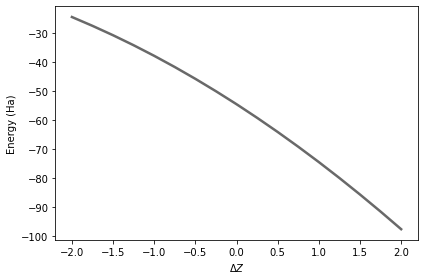

In [6]:
df_system_qa = df_qc.query('system == "n" & charge == 0 & multiplicity == 4 & basis_set == @selected_basis_set')

# Gets the lambda_values in increasing order.
sort_lambda_idx = np.argsort(df_system_qa['lambda_value'].values)
lambda_values_qa = df_system_qa['lambda_value'].values[sort_lambda_idx]
energies_qa = df_system_qa['electronic_energy'].values[sort_lambda_idx]



###   FIGURE   ###
fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.patch.set_facecolor('white')

# Alchemical PES
ax.plot(
    lambda_values_qa, energies_qa,
    color='dimgrey', linewidth=2.5,
)

ax.set_xlabel('$\Delta Z$')

ax.set_ylabel('Energy (Ha)')


The x axis is the change in nuclear charge ($\Delta Z$) or $\lambda$.
In reality, each interger $\lambda$ represents a quantum alchemy target system.
The special case is $\lambda = 0$, which specifies the quantum alchemy reference.
Note that we could instead use B<sup>$2-$</sup> as a reference and get the same PES&mdash;assuming there are no differences in quantum alchemy references, which there are.

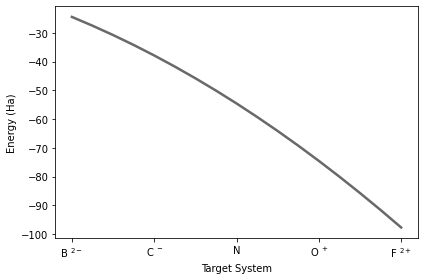

In [7]:
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xticklabels(['B $^{2-}$', 'C $^{-}$', 'N', 'O $^{+}$', 'F $^{2+}$'])
ax.set_xlabel('Target System')

fig

## Quantum alchemy with a Taylor series

We can make an approximation of this PES using a Taylor series centered on some reference.

In [8]:
n_electrons = df_system_qa.iloc[0]['n_electrons']

df_qats_sys = df_qats.query(
    'n_electrons == @n_electrons'
    '& charge == 0'
    '& basis_set == "aug-cc-pV5Z"'
    '& multiplicity == 4'
)
df_qats_sys

,system,atomic_numbers,charge,multiplicity,n_electrons,qc_method,basis_set,lambda_range,finite_diff_delta,finite_diff_acc,poly_coeffs
77,n,[7],0,4,7,UCCSD(T),aug-cc-pV5Z,"(-2, 2)",0.01,2,"[-54.562665269887255, -18.33425478373165, -1.6..."


To make predictions with the Taylor series, you just need the polynomial coefficients and the `qats_prediction` function.
We are just going to use a second-order Taylor series.

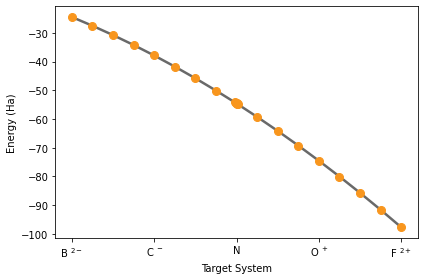

In [9]:
ts_order = 2
poly_coeffs = df_qats_sys.iloc[0]['poly_coeffs']

energies_qats = qats_prediction(poly_coeffs, ts_order, lambda_values_qa)
energies_qats = energies_qats[0]


ax.plot(
    lambda_values_qa, energies_qats,
    color='#F8961E',
    marker='o', markersize=8,
    linestyle='', label=f'QATS-{ts_order}'
)

fig

## Property predictions

Many functions in this repository are aimed at predicting some property such as ionization energy, electron affinity, or multiplicity gap.
All they are used for is automating querying these dataframes for the desired system properties and possibly making predictions.

One example would be the ionization energy of Nitrogen.
We can directly compute this with quantum chemistry using the `energy_change_charge_qc_atom` function.

In [10]:
target_label = 'n'
delta_charge = 1

ie_n_qc = energy_change_charge_qc_atom(
    df_qc, target_label, delta_charge, target_initial_charge=0,
    change_signs=False, basis_set='aug-cc-pV5Z',
    ignore_one_row=True
)
ie_n_qc = hartree_to_ev(ie_n_qc)

print(f'Ionization energy of N: {ie_n_qc:.4f} eV (from quantum chemistry)')

Ionization energy of N: 14.5407 eV (from quantum chemistry)


To make predictions using quantum alchemy, we use the `energy_change_charge_qa_atom` function.
However, instead of returning one value (like above) it returns a dictionary of all quantum alchemy references.
We convert this dictionary into a pandas dataframe just to print things nicer here.
The columns are different quantum alchemy references.

In [11]:
target_label = 'n'
delta_charge = 1
use_ts = False

ie_n_qa = energy_change_charge_qa_atom(
    df_qc, df_qats, target_label, delta_charge,
    basis_set='aug-cc-pV5Z', use_ts=use_ts
)

ie_n_qa = {key:hartree_to_ev(value) for key,value in ie_n_qa.items()}
ie_n_qa = pd.DataFrame(ie_n_qa, index=['QA'])

print('Quantum alchemy for ionization energies')
ie_n_qa

Quantum alchemy for ionization energies


,b,c,o
QA,14.487712,14.52985,14.542332


We can also use a Taylor series to make ionization energy predictions.
This is done by setting `use_ts` to `True`.
All possible orders of the Taylor series are returned instead of just one value.

In [12]:
target_label = 'n'
delta_charge = 1
use_ts = True  # Changed

ie_n_qats = energy_change_charge_qa_atom(
    df_qc, df_qats, target_label, delta_charge, target_initial_charge=0,
    change_signs=False, basis_set='aug-cc-pV5Z', use_ts=use_ts,
    ignore_one_row=True, considered_lambdas=None, return_qats_vs_qa=False
)

ie_n_qats = {key:hartree_to_ev(value) for key,value in ie_n_qats.items()}
ie_n_qats = pd.DataFrame(ie_n_qats, index=[f'QATS-{i}' for i in range(0, 5)])

print('Quantum alchemy with Taylor series for ionization energies')
ie_n_qats

Quantum alchemy with Taylor series for ionization energies


,b,c,o
QATS-0,-3.340147,1.252385,35.139212
QATS-1,0.433103,10.539000,11.021143
QATS-2,0.513997,14.999819,14.510379
QATS-3,23.749906,14.326189,14.535715
QATS-4,59.995413,14.070387,14.540879


## Final remarks

That is pretty much the gist of how this repository analyzes the data.
Notebooks in the `atom` and `dimer` directory go over how we analyzed and prepared tables and figures for the manuscripts.